In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [135]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False 

In [111]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [112]:
pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import pandas_profiling

In [114]:
path_celeb = '/content/drive/MyDrive/cp2/celebrity.csv'
path_char  = '/content/drive/MyDrive/cp2/chat_data.csv'
path_charR = '/content/drive/MyDrive/cp2/chat_raw.csv'
path_room  = '/content/drive/MyDrive/cp2/room_info.csv'

df_celeb = pd.read_csv(path_celeb,encoding='CP949')
df_chat  = pd.read_csv(path_char,encoding='CP949')
df_chatR = pd.read_csv(path_charR,encoding='CP949')
df_room  = pd.read_csv(path_room,encoding='CP949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [150]:
df_celeb[df_celeb['방인원'] != 1]

,닉네임,이메일,방인원,회원가입일,보유샷,받은샷,셀럽 여부
0,귀욤효닝뀨,azaazaez@gmail.com,4,2022-09-19 10:30:21.710,NaN,NaN,celeb
5,Martina Rose,rose@onebitstudios.com,11,2022-09-18 11:31:51.763,NaN,NaN,celeb
6,땅콩이야,iamddce@naver.com,21,2022-09-17 22:47:31.360,NaN,210.0,celeb
10,글라세,sweet.glace92@gmail.com,22,2022-09-16 21:36:33.353,NaN,NaN,celeb
13,한라봄,han_rabom@naver.com,21,2022-09-16 14:01:39.980,NaN,NaN,celeb
...,...,...,...,...,...,...,...
1378,솔로몬,rlawjddnja1@daum.net,4,2021-06-18 07:07:39.000,NaN,NaN,celeb
1379,위칭,witching_@daum.net,135,2021-06-12 13:53:34.000,40.0,4570.0,celeb
1380,한나랑 뚜뚜랑 삼동이??,ziniworking@gmail.com,20,2021-06-12 10:42:59.000,NaN,233.0,celeb
1381,말썽 NO.1 고영희 ??,dana@fancim.me,42,2021-06-12 05:56:31.000,300.0,5.0,celeb


In [115]:
df_celeb

,닉네임,이메일,방인원,회원가입일,보유샷,받은샷,셀럽 여부
0,귀욤효닝뀨,azaazaez@gmail.com,4,2022-09-19 10:30:21.710,NaN,NaN,celeb
1,은담비_,tamptambin@naver.com,1,2022-09-18 23:37:01.460,NaN,NaN,celeb
2,안치주,eamy101247@naver.com,1,2022-09-18 18:45:22.980,NaN,NaN,celeb
3,티아쿠아,tiaqua1013@naver.com,1,2022-09-18 17:30:49.457,NaN,NaN,celeb
4,옥숭아,wnghkdznzl@naver.com,1,2022-09-18 17:15:54.370,NaN,NaN,celeb
...,...,...,...,...,...,...,...
1378,솔로몬,rlawjddnja1@daum.net,4,2021-06-18 07:07:39.000,NaN,NaN,celeb
1379,위칭,witching_@daum.net,135,2021-06-12 13:53:34.000,40.0,4570.0,celeb
1380,한나랑 뚜뚜랑 삼동이??,ziniworking@gmail.com,20,2021-06-12 10:42:59.000,NaN,233.0,celeb
1381,말썽 NO.1 고영희 ??,dana@fancim.me,42,2021-06-12 05:56:31.000,300.0,5.0,celeb


In [116]:
df_chatR.head()

,message_id,channel_url,sender_id,sender_nickname,type,message,created_at
0,1701907401,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,으어~ 오늘도 재밌엉ㅎ습니다,2022-02-27 01:03:05+0900
1,1701907472,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,"@,@",2022-02-27 01:03:06+0900
2,1701914782,sendbird_group_channel_46714279_5689ed3637baad...,lch6191@naver.com,dvl zzang,MESG,dvl zzang 님이 나갔습니다.,2022-02-27 01:05:20+0900
3,1701937405,sendbird_group_channel_47434712_1b4c1283dc929d...,vip2405@daum.net,불새의전설,MESG,담사장 오늘도 너무고생했어요~!,2022-02-27 01:11:45+0900
4,1701973210,sendbird_group_channel_47137877_f7e02b815f1428...,skyshows@naver.com,어짜피 최고 귀여운 사람은 뽀린걸,MESG,뽀린걸 만세,2022-02-27 01:22:00+0900


In [117]:
df_room

,channel_url,channel_name,message_count,channel_created_at,channel_custom_type,channel_member_count,read_receipt
0,sendbird_group_channel_75064829_d8867f901e00a8...,♡,39,1653640427,NaN,21,"{'wlwnsgh3@naver.com': 0, 'dldydgus1995@gmail...."
1,sendbird_group_channel_49383617_94ee4f7f4dc9d2...,김씨할매와 손주들,1,1634318408,NaN,25,"{'mind4826@naver.com': 0, 'fancimnpc2@fancim.m..."
2,sendbird_group_channel_46714279_5689ed3637baad...,임선비,65,1631694533,NaN,776,"{'jongone415@naver.com': 0, 'gim05209@naver.co..."
3,sendbird_group_channel_49386022_7ff846472c2bbe...,비비큐냠냠,1,1634321840,NaN,12,"{'everysleep0425@naver.com': 0, 'tlsehd1222@na..."
4,sendbird_group_channel_75092089_63f52f4b6b09f7...,왕군,125,1653655832,NaN,29,"{'gudwns9047@naver.com': 0, 'pdkkoedol@gmail.c..."
...,...,...,...,...,...,...,...
281,sendbird_group_channel_92898152_fc76af73046e9a...,네므님,1656,1663056795,NaN,29,"{'acewodnjs@naver.com': 0, 'fkriesz@gmail.com'..."
282,sendbird_group_channel_92937648_459e0eae1d1e7a...,정밀추적,6,1663084329,NaN,2,"{'a032714@naver.com': 0, 'fancimnpc6@fancim.me..."
283,sendbird_group_channel_92960482_de65180e83fbe1...,평범입니다!,317,1663112372,NaN,15,"{'ehak159@gmail.com': 0, 'dkdlrkdl74@naver.com..."
284,sendbird_group_channel_92964412_89e7646321c98e...,연루나,5,1663116353,NaN,2,"{'yonluna1115@gmail.com': 0, 'fancimnpc6@fanci..."


In [118]:
df_room.rename(columns = {'channel_name' : 'channel_owner'}, inplace = True)
df_room

,channel_url,channel_owner,message_count,channel_created_at,channel_custom_type,channel_member_count,read_receipt
0,sendbird_group_channel_75064829_d8867f901e00a8...,♡,39,1653640427,NaN,21,"{'wlwnsgh3@naver.com': 0, 'dldydgus1995@gmail...."
1,sendbird_group_channel_49383617_94ee4f7f4dc9d2...,김씨할매와 손주들,1,1634318408,NaN,25,"{'mind4826@naver.com': 0, 'fancimnpc2@fancim.m..."
2,sendbird_group_channel_46714279_5689ed3637baad...,임선비,65,1631694533,NaN,776,"{'jongone415@naver.com': 0, 'gim05209@naver.co..."
3,sendbird_group_channel_49386022_7ff846472c2bbe...,비비큐냠냠,1,1634321840,NaN,12,"{'everysleep0425@naver.com': 0, 'tlsehd1222@na..."
4,sendbird_group_channel_75092089_63f52f4b6b09f7...,왕군,125,1653655832,NaN,29,"{'gudwns9047@naver.com': 0, 'pdkkoedol@gmail.c..."
...,...,...,...,...,...,...,...
281,sendbird_group_channel_92898152_fc76af73046e9a...,네므님,1656,1663056795,NaN,29,"{'acewodnjs@naver.com': 0, 'fkriesz@gmail.com'..."
282,sendbird_group_channel_92937648_459e0eae1d1e7a...,정밀추적,6,1663084329,NaN,2,"{'a032714@naver.com': 0, 'fancimnpc6@fancim.me..."
283,sendbird_group_channel_92960482_de65180e83fbe1...,평범입니다!,317,1663112372,NaN,15,"{'ehak159@gmail.com': 0, 'dkdlrkdl74@naver.com..."
284,sendbird_group_channel_92964412_89e7646321c98e...,연루나,5,1663116353,NaN,2,"{'yonluna1115@gmail.com': 0, 'fancimnpc6@fanci..."


In [119]:
# 데이터 전처리. (# 1번만 할 것)

# 데이터 맨 뒤의 쓰레기값 제거
df_chat = df_chat[:-8]  

# id type 결측치 채우기
df_chat.loc[df_chat['channel_member_count'].isna() & df_chat['id type'].isna(), 'id type'] = 'fan'

# new_type 추가(파일의 종류도 분류)
df_chat['new_type'] = df_chat['type'].copy()

df_chat.loc[(df_chat['type'] == 'FILE') & (df_chat['message'].str.contains('/fancimm/sticker')), 'new_type'] = 'STICKER'
df_chat.loc[(df_chat['type'] == 'FILE') & ~(df_chat['message'].str.contains('/fancimm/sticker')) & ( (df_chat['message'].str.contains('.jpe') ) | (df_chat['message'].str.contains('.png')) | (df_chat['message'].str.contains('.jpg')) ), 'new_type'] = 'IMAGE'
df_chat.loc[(df_chat['type'] == 'FILE') & ~(df_chat['message'].str.contains('/fancimm/sticker')) & ((df_chat['message'].str.contains('.mp4')) | (df_chat['message'].str.contains('.wav')) | (df_chat['message'].str.contains('.mov')) ), 'new_type'] = 'VIDEO'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [120]:
#pr=df_chat.profile_report()

In [121]:
#pr

In [149]:
len(df_chat[df_chat['id type'] == 'celeb']['sender_id'].unique())

551

In [147]:
df_chat['new_type'].value_counts()

MESG       569470
IMAGE       30925
STICKER      1473
VIDEO        1097
ADMM           16
Name: new_type, dtype: int64

In [123]:
list_ch = df_chat['channel_url'].unique() # 690

# 채팅방 별 dataframe
list_df = []
best_ch = ''
max = 0

list_lenPerRoom = []
list_datePerRoom = []
list_df_9over = []

for ch in list_ch:

  tmp_df = df_chat[df_chat['channel_url'] == ch]
  if len(tmp_df) > max:
    max = len(tmp_df)
    best_ch = ch
  list_df.append(tmp_df)
  list_lenPerRoom.append(len(tmp_df))
  #print( (pd.to_datetime(tmp_df.iloc[-1, 6]) - pd.to_datetime(tmp_df.iloc[0, 6])).days )
  #break
  list_datePerRoom.append((pd.to_datetime(tmp_df['created_at'].max()) - pd.to_datetime(tmp_df['created_at'].min())).days)
  #list_datePerRoom.append((pd.to_datetime(tmp_df.iloc[-1, 6]) - pd.to_datetime(tmp_df.iloc[0, 6])).days)
  


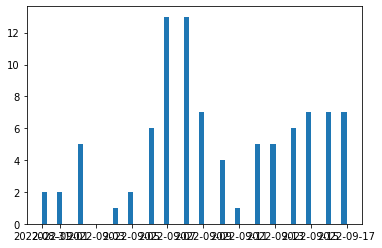

In [180]:
date_list = []
from datetime import datetime
#dt = datetime.strptime(str(item['delngDe']), '%Y%m%d')

for i in range(len(list_df)):
  if int(list_df[i]['created_at'].min()[:10].replace('-', '')) < 20220831:
    continue
  datetime_object = datetime.strptime(list_df[i]['created_at'].min()[:10], '%Y-%m-%d')
  date_list.append(datetime_object)
  
#date_list

plt.hist(date_list, bins=60)
plt.show()

In [181]:

len(date_list)

93

In [ ]:
date_list.hist()

In [124]:
print('메세지가 있는 방의 개수 = ', len(list_lenPerRoom))


메세지가 있는 방의 개수 =  690


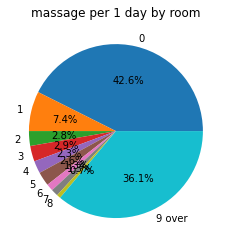

In [138]:
df_tmp = pd.DataFrame()

list_average = []
for i in range(len(list_lenPerRoom)):
  if list_datePerRoom[i] != 0:
    list_average.append(list_lenPerRoom[i]/list_datePerRoom[i])
  else:
    list_average.append(0)


tmp_list = [0] * 10
for i in range(len(list_lenPerRoom)):
  if int(list_lenPerRoom[i]/10) >= 10:
    tmp_list[9] += 1
  else:
    tmp_list[int(list_lenPerRoom[i]/10)] += 1

plt.pie(tmp_list, labels=[0,1, 2, 3, 4, 5, 6, 7, 8, '9 over'],  autopct='%.1f%%')
plt.title('massage per 1 day by room')
plt.show()


In [144]:
list_df[0]

,channel_name,channel_url,sender_id,sender_nickname,type,message,created_at,id type,channel_member_count,Unnamed: 9,Unnamed: 10,Unnamed: 11,new_type
0,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,으어~ 오늘도 재밌엉ㅎ습니다,2022-02-27 01:03:05+0900,celeb,135.0,NaN,NaN,NaN,MESG
1,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,"@,@",2022-02-27 01:03:06+0900,celeb,135.0,NaN,NaN,NaN,MESG
57,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,uikap.kim@gmail.com,아이뽀,MESG,아이뽀 님이 참여했습니다.,2022-02-27 23:12:34+0900,fan,NaN,NaN,NaN,NaN,MESG
58,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,uikap.kim@gmail.com,아이뽀,MESG,아이뽀 님이 나갔습니다.,2022-02-27 23:13:18+0900,fan,NaN,NaN,NaN,NaN,MESG
281,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,2022-03-01 13:43:28+0900,celeb,135.0,NaN,NaN,NaN,MESG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553844,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,jm97kkd@gmail.com,손톱달이,MESG,??????,2022-08-27 23:48:29+0900,fan,NaN,NaN,NaN,NaN,MESG
553845,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,내일은 아마...12시 정도부터 5시까지 팝콘에 있을 것 같아요!,2022-08-27 23:48:36+0900,celeb,135.0,NaN,NaN,NaN,MESG
553846,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,jm97kkd@gmail.com,손톱달이,MESG,구빰구빰,2022-08-27 23:48:41+0900,fan,NaN,NaN,NaN,NaN,MESG
553847,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,jm97kkd@gmail.com,손톱달이,MESG,주말워킹칭 ㅠㅠ,2022-08-27 23:48:57+0900,fan,NaN,NaN,NaN,NaN,MESG


In [126]:
sum(list_average)/len(list_lenPerRoom)

25.09152930309389

559


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

306950    ?? 곰돌파 ??
306951    ?? 곰돌파 ??
306952    ?? 곰돌파 ??
306972    ?? 곰돌파 ??
306973    ?? 곰돌파 ??
            ...    
597730    ?? 곰돌파 ??
597801    ?? 곰돌파 ??
597802    ?? 곰돌파 ??
597803    ?? 곰돌파 ??
597807    ?? 곰돌파 ??
Name: channel_name, Length: 4100, dtype: object
hour
0     203
1      77
2      16
3       5
4       8
7       4
8      34
9      19
10     29
11     28
12     48
13     72
14    143
15    143
16     53
17    241
18    214
19    424
20    344
21    661
22    794
23    540
dtype: int64


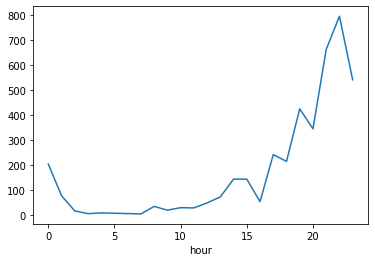

In [143]:
# 입력으로 dataframe과 채널 url을 집어넣으면 해당 채널의 메세지만 가져옴
def GetMessageByRoom(df):

  pass


from datetime import timedelta
pd.to_datetime(list_df[0]['created_at'])


df_analysis = pd.DataFrame()
# index는 sender_nickname
#df_analysis.columns = ['IsCeleb', 'MessagePerDay', 'StickerPerDay', 'ImagePerDay', 'VideoPerDay' ]

ch_index = 0
for i in range(len(list_df)):
  if list_df[i].iloc[0, 1] == best_ch:
    ch_index = i
    break
print(ch_index)

list_df[ch_index]['year'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.year
list_df[ch_index]['month'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.month
list_df[ch_index]['day'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.day
list_df[ch_index]['hour'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.hour

list_fan = list_df[ch_index]['sender_nickname']
for fan in list_fan:

  if  list_df[ch_index].iloc[0, 1] != best_ch:
    continue

  # 특정 방에 있는 사람A의 chat data
  df_fan = list_df[ch_index].groupby('sender_nickname').get_group(fan)
  
  # 스티커 메세지만 뽑기
  df_fan[df_fan['type'] == 'STICKER']
  # 이미지 메세지만 뽑기
  df_fan[df_fan['type'] == 'IMAGE']
  # 동영상 메세지만 뽑기
  df_fan[df_fan['type'] == 'VIDEO']

  df_fan.groupby([ 'hour']).size().plot()
  print(df_fan['channel_name'])
  print(df_fan.groupby(['hour']).size())
  break
  # MessagePerDay = df_fans
  # StickerPerDay = []
  # ImagePerDay = []
  # VideoPerDay = []


def GetMessagePerDay(df, channel_url):
  return df_result


df_tmp = GetMessagePerDay(df_chat, best_ch)



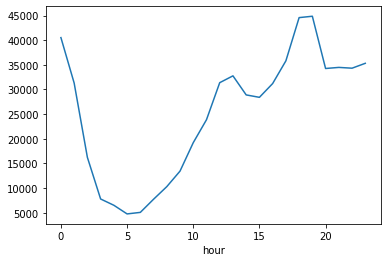

In [146]:
 df_chat['hour'] = pd.to_datetime(df_chat['created_at']).dt.hour

 df_chat.groupby([ 'hour']).size().plot()
 

In [128]:
list_df[ch_index]

,channel_name,channel_url,sender_id,sender_nickname,type,message,created_at,id type,channel_member_count,Unnamed: 9,Unnamed: 10,Unnamed: 11,new_type,year,month,day
306950,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,tpgusvkeh0@gmail.com,세 현??,MESG,자고있는지는...모르겠지만!\n공사 멋지게 잘 마무리 되었는지..마음에 들게 끝났는...,2022-08-28 00:53:23+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28
306951,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,tpgusvkeh0@gmail.com,세 현??,MESG,오늘 하루..? 어제 하루도도 고생했어! o(〃’▽’〃)o,2022-08-28 00:54:03+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28
306952,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,tpgusvkeh0@gmail.com,세 현??,MESG,나는 기분좋은 일이 있었는데!\n뭐냐면.. 오후에 밖에 나갔다가 돌아오는 길에 \n...,2022-08-28 01:36:32+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28
306953,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,dahye168@naver.com,하리보,FILE,https://file-ap-2.sendbird.com/b6d0c7d05faa447...,2022-08-28 01:37:33+0900,fan,NaN,NaN,NaN,NaN,IMAGE,2022,8,28
306954,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,yeson0621@gmail.com,됴,MESG,지금 올라온 거 잘 볼게요!,2022-08-28 02:28:06+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597815,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,예쁘다! :),2022-08-27 23:12:51+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27
597816,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,밤이 늦었네,2022-08-27 23:13:05+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27
597817,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,푹 잘 자길 바라,2022-08-27 23:13:09+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27
597818,?? 곰돌파 ??,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,오늘도 고생많았어,2022-08-27 23:13:18+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27


In [129]:
list_df[0][list_df[0]['type'] == 'FILE']['message'].str.contains('/fancimm/sticker')

282       False
343       False
363       False
367       False
370       False
          ...  
553817     True
553822     True
553825     True
553828    False
553835    False
Name: message, Length: 960, dtype: bool

In [130]:
list_df[0][(list_df[0]['type'] != 'FILE') & (list_df[0]['message'].str.contains('mpZz'))]

,channel_name,channel_url,sender_id,sender_nickname,type,message,created_at,id type,channel_member_count,Unnamed: 9,Unnamed: 10,Unnamed: 11,new_type


In [ ]:


for i in range(1, 4):
  # 1월 자료는 없고 2월 자료는 27일부터라 제외
  if i > 2 :
    df_tmp = list_df[0][pd.to_datetime(list_df[0]['created_at']).dt.month == i]

df_tmp.groupby('sender_nickname').size()


In [ ]:
!pip install sentence_transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import re

In [ ]:
df = df[df['message'].str.contains('참여했습니다')== False]

In [ ]:
df_MESG = df[df['type'] == 'MESG']
df_MESG.head()

,channel_url,sender_nickname,type,message,created_at
0,sendbird_group_channel_40668210_6bf11f559df808...,OBPHEVNYNXCGJFIQVPGKTVOQK,MESG,스트레스 받아서 개 미쳐버릴거 같다 진짜 전화를 몇 번을 하는거야,2021-08-21 01:03:46+0900
1,sendbird_group_channel_40668210_6bf11f559df808...,OBPHEVNYNXCGJFIQVPGKTVOQK,MESG,고소사건 잘 끝났다고 말씀 드렸잖아요,2021-08-21 01:04:00+0900
2,sendbird_group_channel_40668210_6bf11f559df808...,OBPHEVNYNXCGJFIQVPGKTVOQK,MESG,아버지:너가 보험 그냥 해줬으면 친척간에 쪽팔릴 일 없지 않았냐,2021-08-21 01:04:21+0900
3,sendbird_group_channel_40668210_6bf11f559df808...,ZCYEQBVWBLAFQRPCDRKKWQKVR,MESG,네네..,2021-08-21 01:04:24+0900
4,sendbird_group_channel_40668210_6bf11f559df808...,OBPHEVNYNXCGJFIQVPGKTVOQK,MESG,개 씨발놈이 이딴식으로 계속 말하는거야 저녁부터,2021-08-21 01:04:34+0900


In [ ]:
def clean_message(df):
  #REPLACE_NO_SPACE = re.compile()
  REPLACE_WITH_SPACE = re.compile(r'[가-힣a-zA-Z]')

  tempArr= []
  for line in df:
    tmpL = line

    # #tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    # tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)

    tmpL = re.sub('[^A-Za-z0-9가-힣]', ' ', tmpL)

    tempArr.append(tmpL)
  return tempArr


In [ ]:
df_MESG['clean_massage'] = clean_message(df_MESG['message'])
df_MESG['clean_massage']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         스트레스 받아서 개 미쳐버릴거 같다 진짜 전화를 몇 번을 하는거야
1                         고소사건 잘 끝났다고 말씀 드렸잖아요
2          아버지 너가 보험 그냥 해줬으면 친척간에 쪽팔릴 일 없지 않았냐
3                                         네네  
4                   개 씨발놈이 이딴식으로 계속 말하는거야 저녁부터
                          ...                 
160256                          묶어보내기안되나 멋슥   
160257                                    잘자요 
160258                 봄이님 수고하셨습니당 중간에렉이걸려서 흑흑
160259              저도 2주년축하한다고 챗쳤는데 읽으셨는지몰겠네영
160260                                        
Name: clean_massage, Length: 144359, dtype: object

In [ ]:
corpus = list(df_MESG['message'])
#corpus = corpus[0:100]

In [ ]:
embedder = SentenceTransformer('jhgan/ko-sroberta-multitask')
corpus_embeddings = embedder.encode(corpus)

In [ ]:
num_clusters = 4
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,스트레스 받아서 개 미쳐버릴거 같다 진짜 전화를 몇 번을 하는거야,3
1,고소사건 잘 끝났다고 말씀 드렸잖아요,2
2,아버지:너가 보험 그냥 해줬으면 친척간에 쪽팔릴 일 없지 않았냐,3
3,네네..,1
4,개 씨발놈이 이딴식으로 계속 말하는거야 저녁부터,3


In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(font_path='/content/drive/MyDrive/SUIT-Regular.ttf', width=800, height=500, random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    

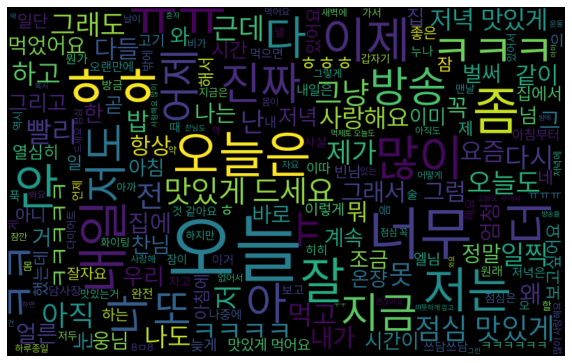

In [ ]:
word_cloud(cluster_df,0)

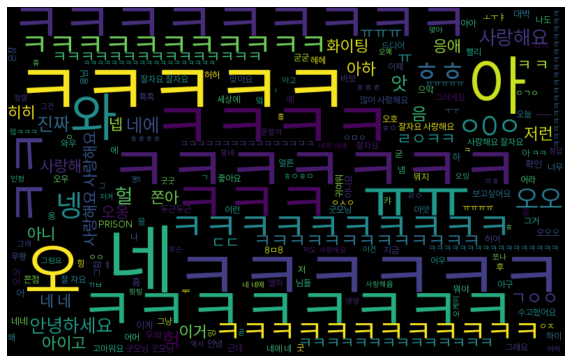

In [ ]:
word_cloud(cluster_df,1)

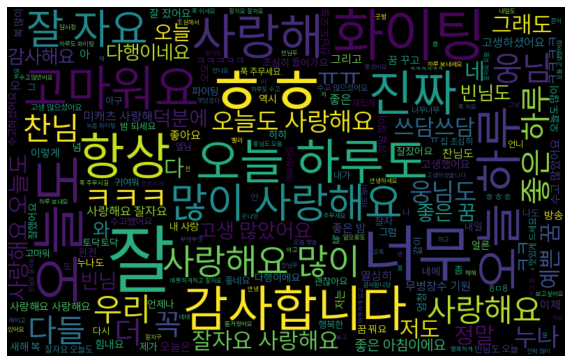

In [ ]:
word_cloud(cluster_df,2)

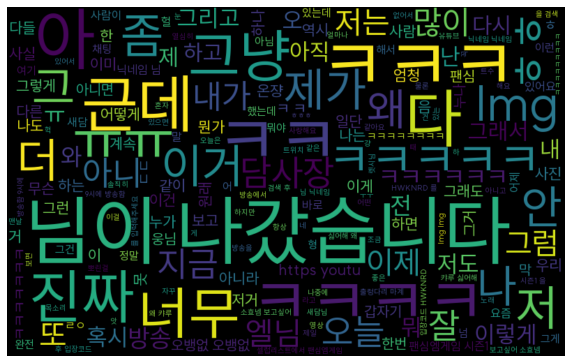

In [ ]:
word_cloud(cluster_df,3)